# 0. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [2]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [24, 24]
    plt.rcParams['font.size'] = 5

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()
    jupyter_settings()
    
sns.set(rc={'figure.figsize':(12,8)})

## data load

In [3]:
#dados obtidos via kaggle 
df1 = pd.read_csv('datasets/Rossmann/train.csv', low_memory=False)
df2 = pd.read_csv('datasets/Rossmann/store.csv')

In [4]:
df = pd.merge(df1,df2,how='left',on='Store')

In [5]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1. DATA PROCESSING

## 1.1 Data clean

In [8]:
shape=df.shape
print('--o dataset contem--\nlinhas = {} \ncolunas = {}'.format(shape[0],shape[1]))

--o dataset contem--
linhas = 1017209 
colunas = 18


In [9]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [10]:
cols_old=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase,cols_old))

#renomear colunas
df.columns = cols_new
df.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

In [11]:
#Date = object
df['date'] = pd.to_datetime(df['date'])
df.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.2 Check NA

In [12]:
df.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [13]:
#competition_distance - distance in meters to the nearest competitor store
df['competition_distance']= df['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x)
                                                             else x )
#competition_open_since_month
df['competition_open_since_month'] = df.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month'])
                                              else x['competition_open_since_month'],axis=1)

 
#competition_open_since_year
df['competition_open_since_year'] = df.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year'])
                                              else x['competition_open_since_year'],axis=1)
#promo2_since_week 
df['promo2_since_week'] = df.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week'])
                                              else x['promo2_since_week'],axis=1)

#promo2_since_year
df['promo2_since_year'] = df.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year'])
                                              else x['promo2_since_year'],axis=1)
#promo_interval
df['promo_interval'].fillna(0,inplace=True)

month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

df['month_map'] = df['date'].dt.month.map(month_map)

df['is_promo']= df[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0,axis=1)




df.isna().sum()


store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [14]:

df.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [15]:
df['competition_open_since_month'] = df['competition_open_since_month'].astype('int64')
df['competition_open_since_year'] = df['competition_open_since_year'].astype('int64')
df['promo2_since_week'] = df['promo2_since_week'].astype('int64')
df['promo2_since_year'] = df['promo2_since_year'].astype('int64')
df.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.3 Descriptive Statistical

In [16]:
num_attributes = df.select_dtypes(include=['int64','float64'])
cat_attributes = df.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### 1.3.1 Numerical Attributes

In [17]:
#medidas tendencia central - mean,median

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#medidas de dispersão - std,skew,kurtosis,min,max,range

ct3 = pd.DataFrame(num_attributes.apply( np.std ) ).T
ct4 = pd.DataFrame(num_attributes.apply( min ) ).T
ct5 = pd.DataFrame(num_attributes.apply( max ) ).T
ct6 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
ct7 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ) ).T
ct8 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T

#concatenate

metrics = pd.concat([ct4,ct5,ct8,ct1,ct2,ct3,ct7,ct6]).T.reset_index()
metrics.columns = ['attributes','min','max','range','mean','median','std','kurtosis','skew']
metrics

,attributes,min,max,range,mean,median,std,kurtosis,skew
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-1.200524,-0.000955
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,-1.246873,0.001593
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,1.778375,0.641460
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,7.091773,1.598650
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,1.090723,-1.758045
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,-1.762018,0.487838
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,0.815154,1.677842
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,147.789712,10.242344
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-1.232607,-0.042076
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,124.071304,-7.235657


### 1.3.1 Categorical Attributes

In [18]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

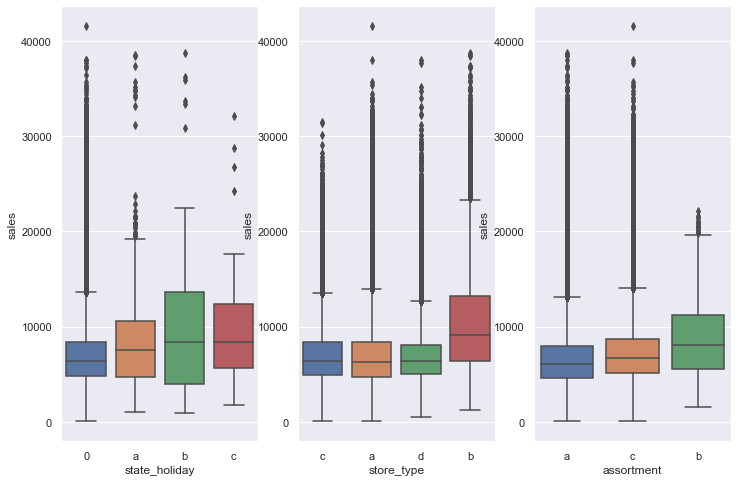

In [19]:
aux1 = df[(df['state_holiday']!=0)&(df['sales']>0)]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday',y='sales',data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='store_type',y='sales',data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='assortment',y='sales',data=aux1)



# 2. FEATURE ENGINEERING

In [20]:
df2 = df.copy()

## 2.1 MAPA MIND DE HIPOTESES DO FENÔMENO

![image](https://drive.google.com/uc?export=view&id=14a2g6DayjCtio04cLgUYcPltNdLN92in)

## 2.2 CRIAÇÃO DE HIPOTESES

### TEMPORAL

1 - LOJA VENDE MENOS NO FIM DE SEMANA

2 - LOJA VENDE MAIS NO FERIADO DE NATAL

3 - LOJA VENDE MAIS NO FINAL DO ANO

4- LOJA VENDE MAIS DEPOIS DO DIA 10 DO MES



### LOJA
5 - LOJAS PERTO DE ESCOLAS VENDEM MENOS

6 - LOJA VENDE MENOS COM CONCORRENCIA PRÓXIMA

7 - LOJA COM MAIS VARIEDADE VENDE MAIS

8 - LOJA COM CONCORRENCIA POR MAIS TEMPO VENDE MAIS



### PRODUTOS


9- LOJA COM PRECOS MENORES COM MAIS TEMPO VENDE MAIS  

10 - LOJA COM PROMOCOES CONSECUTIVAS VENDE MAIS 



## 2.3 DERIVAR VARIAVEIS

In [21]:
#day
df2['day'] = df2['date'].dt.day
#weekofyear
df2['week_of_year'] = df2['date'].dt.weekofyear
#yearweek
df2['year_week'] = df2['date'].dt.strftime('%Y-%M')
#year
df2['year'] = df2['date'].dt.year
#month
df2['month'] = df2['date'].dt.month



#competition_since
df2['competition_since']= df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1),axis=1)
df2['competition_time_month']= ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

#promo_since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x+'-1','%Y-%W-%w')-datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date']-df2['promo_since'])/7).apply(lambda x: x.days).astype(int)


#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x=='a' else 'extra' if x=='b' else 'extended')
#state_holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x== 'a' else 'easter_holiday' if x=='b' else 'xmas_holiday' if x=='c' else 'regular_day')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_10496\1370699385.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [22]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


## 2.4 FILTRAR VARIAVEIS

In [23]:
df3 = df2.loc[(df2['sales']>0)&(df2['open']==1)]
df3 = df3.drop(columns=['customers', 'open','promo_interval','month_map'])
df3.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a
assortment,basic,basic,basic,extended,basic
competition_distance,1270.0,570.0,14130.0,620.0,29910.0


# 3. EXPLORATORY DATA ANALYSIS

## 3.1 Reponse variable



C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

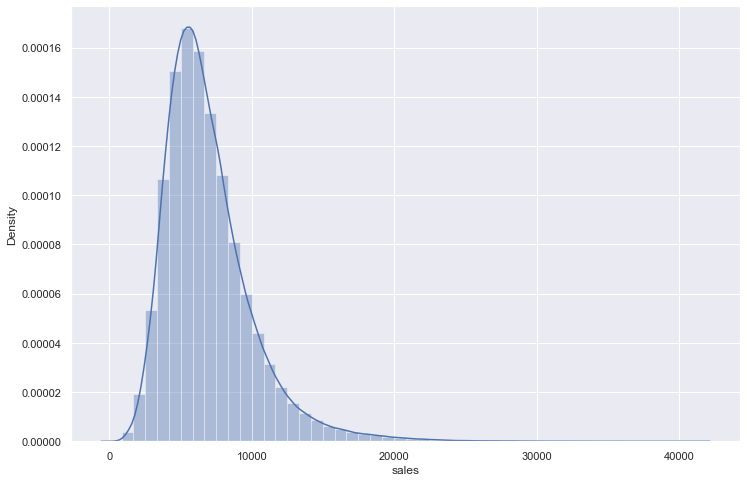

In [24]:
sns.distplot(df3['sales'],kde=True)

C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

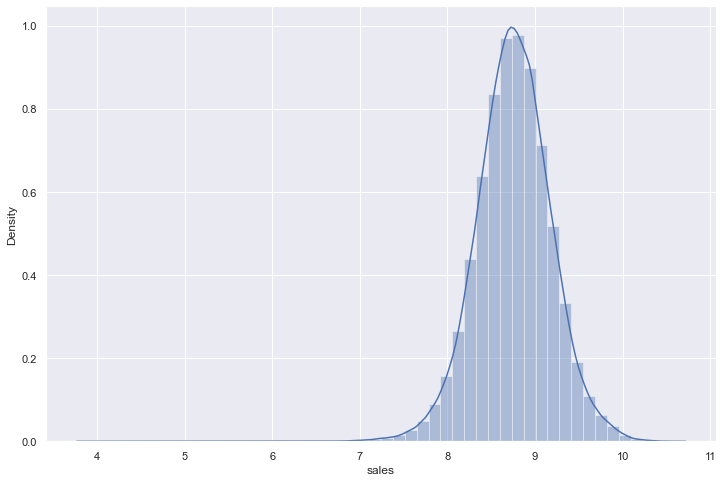

In [25]:
sns.distplot(np.log1p(df3['sales']))



## 3.2 Analise univariada


In [26]:
num_attributes_new = df3.select_dtypes(include=['int64','float64'])
cat_attributes_new = df3.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### 3.2.1 numerical variables


array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'customers'}>],
       [<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'promo'}>,
        <AxesSubplot:title={'center':'school_holiday'}>,
        <AxesSubplot:title={'center':'competition_distance'}>],
       [<AxesSubplot:title={'center':'competition_open_since_month'}>,
        <AxesSubplot:title={'center':'competition_open_since_year'}>,
        <AxesSubplot:title={'center':'promo2'}>,
        <AxesSubplot:title={'center':'promo2_since_week'}>],
       [<AxesSubplot:title={'center':'promo2_since_year'}>,
        <AxesSubplot:title={'center':'is_promo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

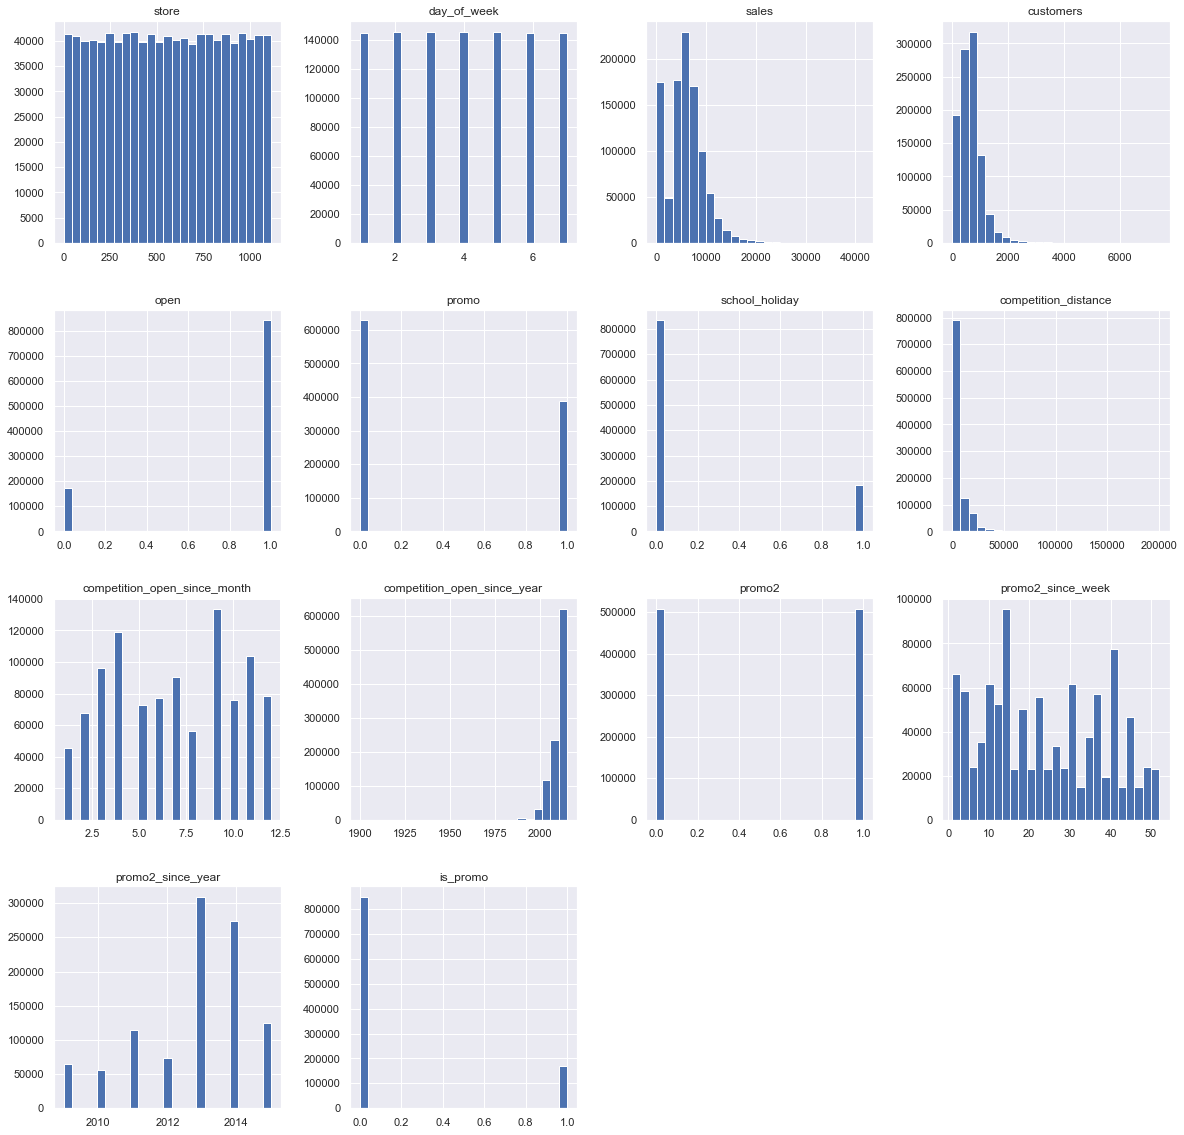

In [27]:
num_attributes.hist(bins=25,figsize=(20,20))

array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'promo'}>],
       [<AxesSubplot:title={'center':'school_holiday'}>,
        <AxesSubplot:title={'center':'competition_distance'}>,
        <AxesSubplot:title={'center':'competition_open_since_month'}>,
        <AxesSubplot:title={'center':'competition_open_since_year'}>],
       [<AxesSubplot:title={'center':'promo2'}>,
        <AxesSubplot:title={'center':'promo2_since_week'}>,
        <AxesSubplot:title={'center':'promo2_since_year'}>,
        <AxesSubplot:title={'center':'is_promo'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'week_of_year'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

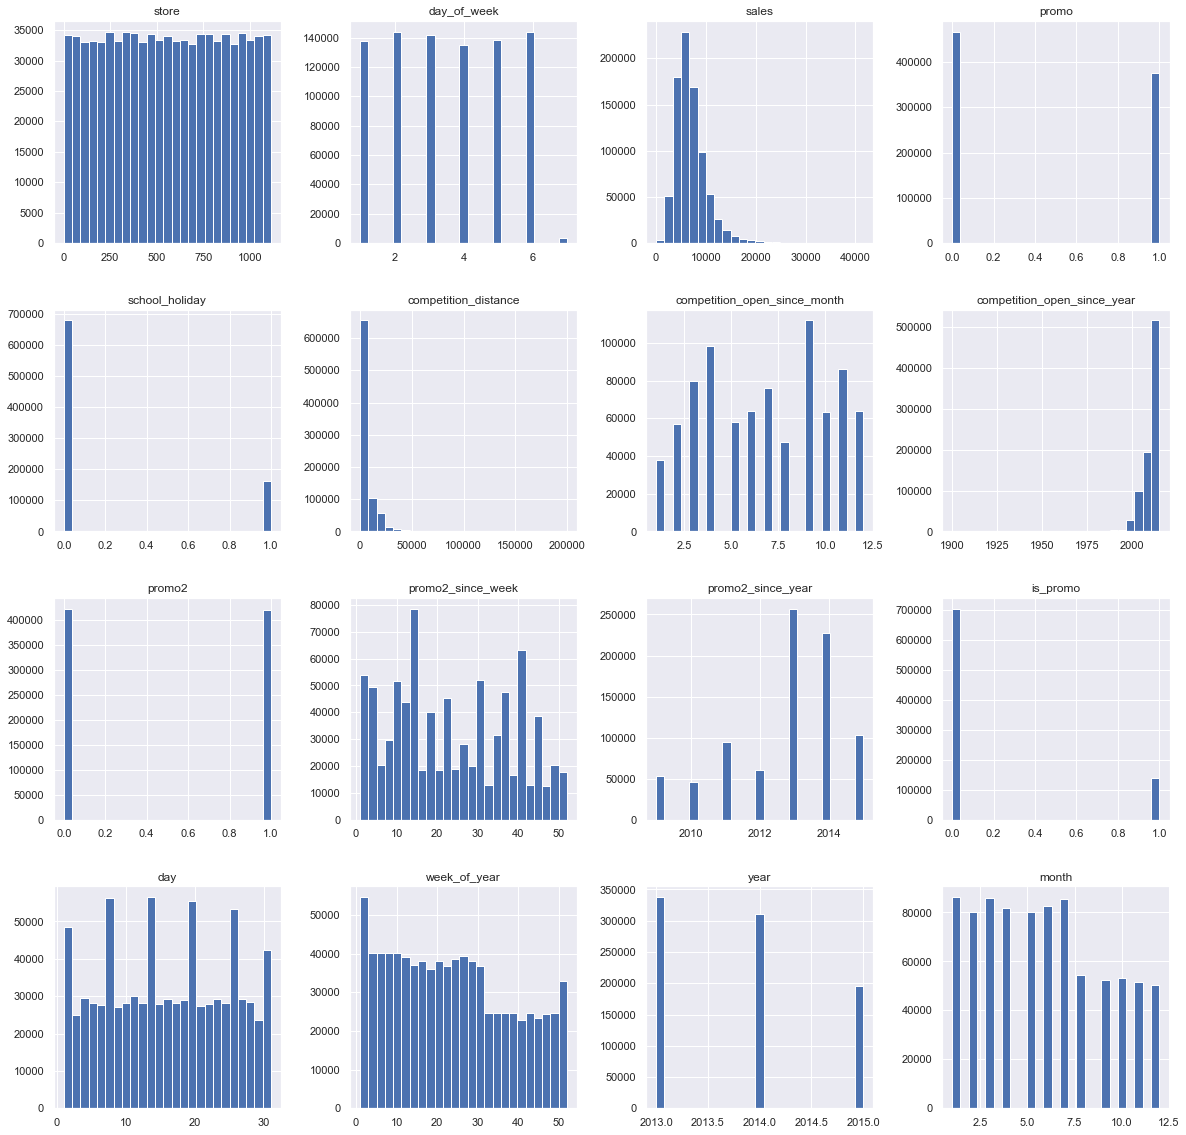

In [28]:
num_attributes_new.hist(bins=25,figsize=(20,20))

In [29]:
##Não faz diferença = dayofweek, promo2
## Não importa o dia da semana, a loja sempre tende a vender
## aparentemente, sem promoção a loja tende a vender mais **
##Sem feriado escolar = + vendas
##Lojas com competidores próximos tendem a vender mais
##

### 3.2.2 categorical variables
countplot + kdeplot
verificar dependencias ( se os feriados tem importancia nas vendas

In [30]:
cat_attributes_new.head()

,state_holiday,store_type,assortment,year_week,competition_time_month,promo_time_week
0,regular_day,c,basic,2015-00,84,0
1,regular_day,a,basic,2015-00,94,279
2,regular_day,a,basic,2015-00,105,226
3,regular_day,c,extended,2015-00,71,0
4,regular_day,a,basic,2015-00,4,0


In [31]:
df3['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126      xmas_holiday
Name: state_holiday, dtype: object

In [32]:
df3['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

In [33]:
df3['store_type'].drop_duplicates()

0     c
1     a
12    d
84    b
Name: store_type, dtype: object

<AxesSubplot:xlabel='sales', ylabel='Density'>

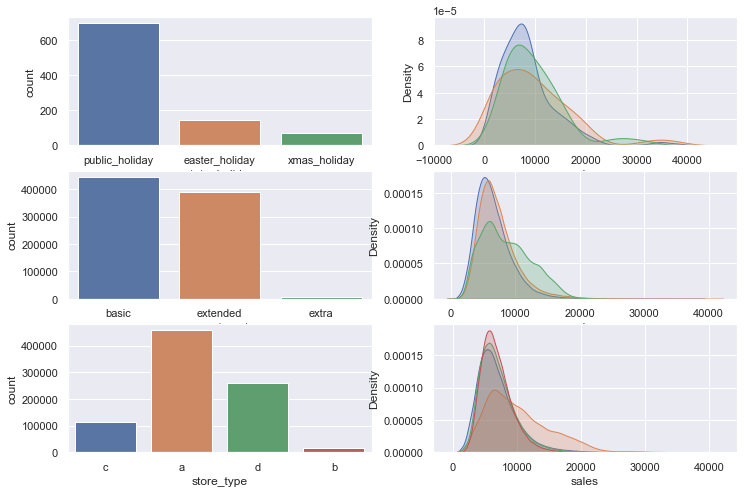

In [34]:
#state holiday study
plt.subplot(3,2,1)
aux = df3.loc[df3['state_holiday']!='regular_day']
sns.countplot(data=aux,x='state_holiday')

plt.subplot(3,2,2)
sns.kdeplot(aux[aux['state_holiday']=='public_holiday']['sales'],label='public_holiday',shade=True)
sns.kdeplot(aux[aux['state_holiday']=='easter_holiday']['sales'],label='easter_holiday',shade=True)
sns.kdeplot(aux[aux['state_holiday']=='xmas_holiday']['sales'],label='xmas_holiday',shade=True)

#assortment study
plt.subplot(3,2,3)
sns.countplot(data=df3,x='assortment')

plt.subplot(3,2,4)
sns.kdeplot(df3[df3['assortment']=='basic']['sales'],label='basic',shade=True)
sns.kdeplot(df3[df3['assortment']=='extended']['sales'],label='extended',shade=True)
sns.kdeplot(df3[df3['assortment']=='extra']['sales'],label='extra',shade=True)

#store type study
plt.subplot(3,2,5)
sns.countplot(data=df3,x='store_type')

plt.subplot(3,2,6)
sns.kdeplot(df3[df3['store_type']=='a']['sales'],label='a',shade=True)
sns.kdeplot(df3[df3['store_type']=='b']['sales'],label='b',shade=True)
sns.kdeplot(df3[df3['store_type']=='c']['sales'],label='c',shade=True)
sns.kdeplot(df3[df3['store_type']=='d']['sales'],label='d',shade=True)
                  


## 3.3 Analise bivariada



### 3.3.1 LOJA VENDE MENOS NO FIM DE SEMANA ->TRUE


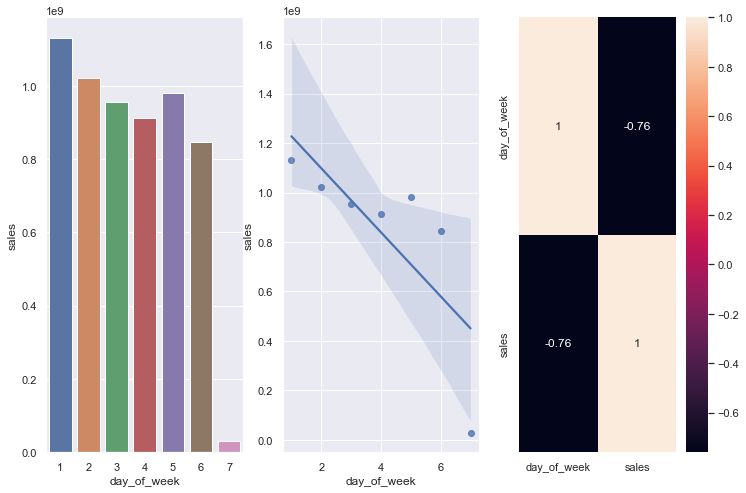

In [35]:
aux = df3[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()
plt.subplot(1,3,1)
sns.barplot(data=aux,x='day_of_week',y='sales');

plt.subplot(1,3,2)
sns.regplot(x='day_of_week',y='sales',data=aux);

plt.subplot(1,3,3)
sns.heatmap(aux.corr(method='pearson'),annot=True);

* As vendas tendem a diminuir com o decorrer da semana visto que, domingo a loja se encontra fechada.

### 3.3.2  LOJA VENDE MAIS NO FERIADO DE NATAL -> FALSE

<AxesSubplot:xlabel='year', ylabel='sales'>

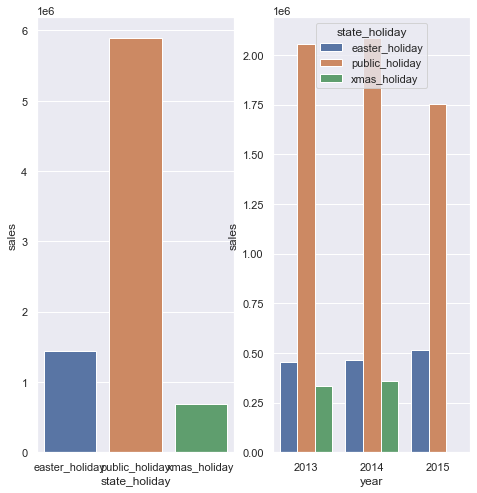

In [36]:
aux = df3.loc[df3['state_holiday']!='regular_day',['sales','state_holiday','year']]
aux2 = aux.groupby('state_holiday').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='state_holiday',y='sales',data=aux2)

plt.subplot(1,3,2)
aux3 = aux.groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x='year',y='sales',hue='state_holiday',data=aux3)



* Public holiday vende mais talvez pelo fato de ter mais dias de public holiday

### 3.3.3 LOJA VENDE MAIS NO FINAL DO ANO -> FALSE



<AxesSubplot:>

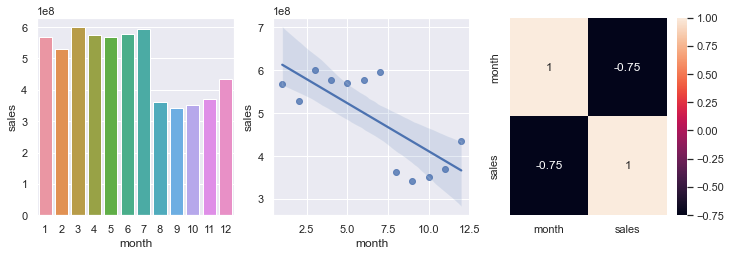

In [37]:
aux = df3[['sales','month']].groupby('month').sum().reset_index()

plt.subplot(2,3,1)
sns.barplot(x='month',y='sales',data=aux)

plt.subplot(2,3,2)
sns.regplot(x='month',y='sales',data=aux)

plt.subplot(2,3,3)
sns.heatmap(aux.corr(method='pearson'),annot=True)






* Após o mês 6 há um decaimento bastante expressivo nas vendas

### 3.3.4  LOJA VENDE MAIS DEPOIS DO DIA 10 DO MES -> TRUE

<AxesSubplot:>

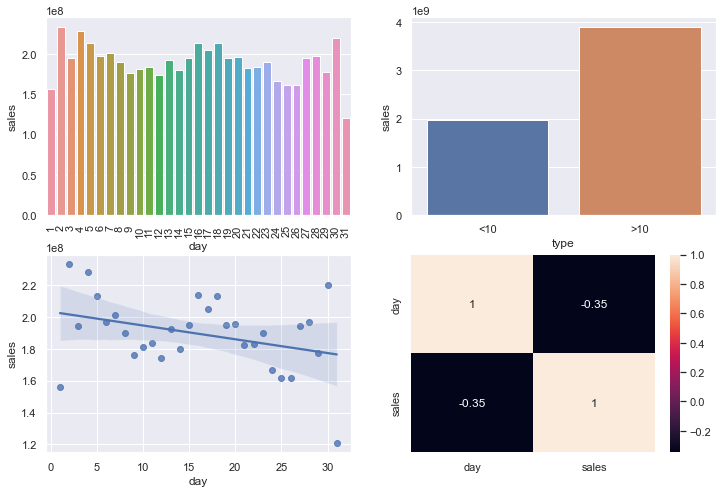

In [38]:
aux = df3[['sales','day']].groupby('day').sum().reset_index()
aux['type'] = aux.apply(lambda x: '<10' if x['day'] <= 10 else '>10',axis=1)
aux2 = aux[['sales','type']].groupby('type').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(x='day',y='sales',data=aux)
plt.xticks(rotation=90)


plt.subplot(2,2,2)
sns.barplot(x='type',y='sales',data=aux2)

plt.subplot(2,2,3)
sns.regplot(x='day',y='sales',data=aux)

plt.subplot(2,2,4)
sns.heatmap(aux.corr(method='pearson'),annot=True)

* Lojas tendem a vender menos após o dia 10, mas como temos muito mais dias pra analisar, a somatória deu maior! 

### 3.3.5 LOJA VENDE MENOS PERTO DE ESCOLAS -> TRUE

<AxesSubplot:xlabel='month', ylabel='sales'>

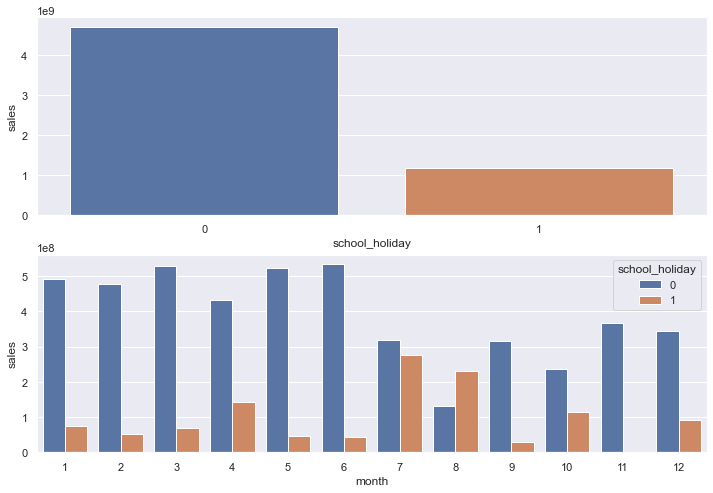

In [39]:
aux = df3[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()
aux2 = df3[['month','school_holiday','sales']].groupby(['month','school_holiday']).sum().reset_index()
plt.subplot(2,1,1)
sns.barplot(x='school_holiday',y='sales',data=aux)

plt.subplot(2,1,2)
sns.barplot(x='month',y='sales',data=aux2,hue='school_holiday')



* Mes 7 e 8 há um comportamento diferente, as vendas se equiparam .

### 3.3.6 LOJA VENDE MENOS COM CONCORRENCIA PRÓXIMA -> FALSE


<AxesSubplot:>

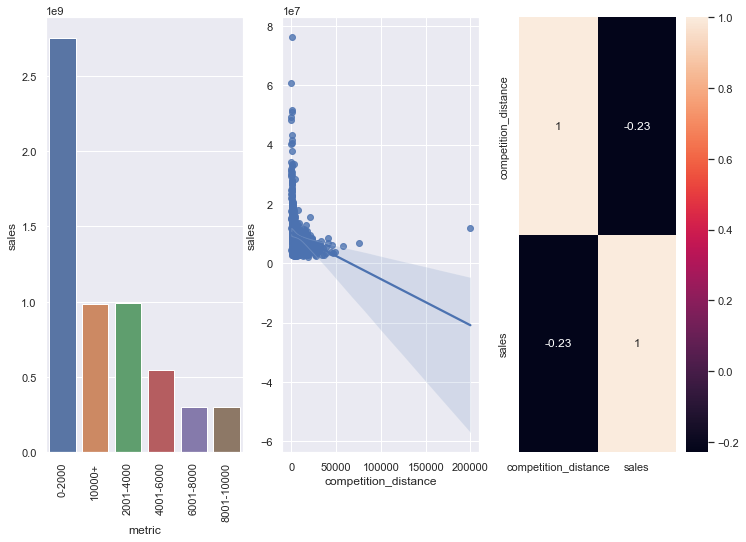

In [40]:
aux = df3[['sales','competition_distance']].groupby('competition_distance').sum().reset_index()
aux['competition_distance'] = aux['competition_distance'].astype(int)
aux['metric'] = aux.apply(lambda x: '0-2000' if  x['competition_distance']<=2000 else 
                          '2001-4000' if 2000<x['competition_distance']<=4000 else
                          '4001-6000' if 4000<x['competition_distance']<=6000 else
                          '6001-8000'if 6000<x['competition_distance']<=8000 else 
                          '8001-10000' if 8000<x['competition_distance']<=10000 else
                          '10000+',axis=1)

aux2=aux[['metric','sales']].groupby('metric').sum().reset_index()
aux2 =aux2.sort_values(by='metric')

plt.subplot(1,3,1)
sns.barplot(x='metric',y='sales',data=aux2)
plt.xticks(rotation=90)


plt.subplot(1,3,2)
sns.regplot(x='competition_distance',y='sales',data=aux)

plt.subplot(1,3,3)
sns.heatmap(aux.corr(method='pearson'),annot=True)


* Lojas vendem mais com concorrência próxima!

### 3.3.7 LOJA COM MAIS VARIEDADE VENDE MAIS -> TRUE

<AxesSubplot:xlabel='month', ylabel='sales'>

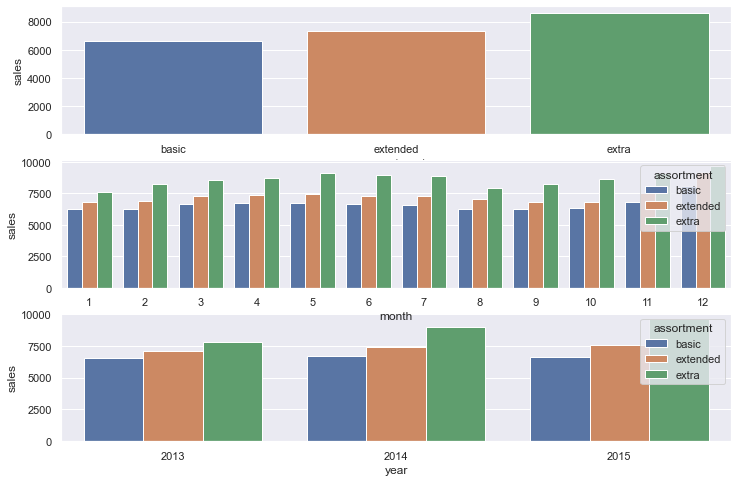

In [41]:
aux = df3 [['assortment','sales']].groupby('assortment').mean().reset_index()


plt.subplot(3,1,1)
sns.barplot(x='assortment',y='sales',data=aux)

plt.subplot(3,1,3)
aux2 = df3[['assortment','sales','year']].groupby(['year','assortment']).mean().reset_index()
sns.barplot(x='year',y='sales',hue='assortment',data=aux2)

plt.subplot(3,1,2)
aux3 = df3 [['assortment','month','sales']].groupby(['month','assortment']).mean().reset_index()
sns.barplot(x='month',y='sales',hue='assortment',data=aux3)




* Em todos os meses as lojas com o tipo extra de assortment vendem mais na média.

### 3.3.8  LOJA COM CONCORRENCIA POR MAIS TEMPO VENDE MAIS -> FALSE

In [42]:
aux = df3[['sales','competition_time_month']].groupby('competition_time_month').sum().reset_index()
aux['competition_time_month'].describe()

count     376.000000
mean      262.500000
std       355.700541
min       -32.000000
25%        61.750000
50%       155.500000
75%       250.250000
max      1407.000000
Name: competition_time_month, dtype: float64

<AxesSubplot:>

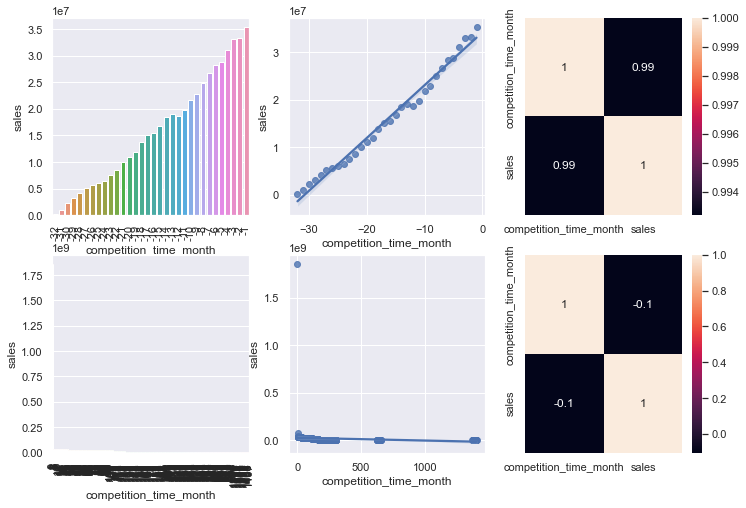

In [43]:
#LOJAS QUE IRÃO TER COMPETIÇÃO
aux2 = aux.loc[aux['competition_time_month']<0]


plt.subplot(2,3,1)
sns.barplot(x='competition_time_month',y='sales',data=aux2)
plt.xticks(rotation=90);

plt.subplot(2,3,2)
sns.regplot(x='competition_time_month',y='sales',data=aux2)

plt.subplot(2,3,3)
sns.heatmap(aux2.corr(method='pearson'),annot=True)

#LOJAS COM COMPETIÇÃO 
aux3 = aux.loc[aux['competition_time_month']>=0]

plt.subplot(2,3,4)
sns.barplot(x='competition_time_month',y='sales',data=aux3)
plt.xticks(rotation=90);

plt.subplot(2,3,5)
sns.regplot(x='competition_time_month',y='sales',data=aux3)

plt.subplot(2,3,6)
sns.heatmap(aux3.corr(method='pearson'),annot=True)


* Lojas que irão ter concorrencia tendem a vender mais, talvez pelo fato de um competidor aquecer o mercado

### 3.3.9 LOJA COM PROMOCAO A MAIS TEMPO VENDE MAIS -> FALSE



In [44]:
aux1=df3[['sales','promo_time_week']].groupby('promo_time_week').sum().reset_index()
aux1

##promo_time_week > 0 -> loja com promocao ativa
##promo_time_week < 0 -> Loja que vai abrir promocao ( quanto mais próximo de 0, mais perto ela está de abrir promoção)

,promo_time_week,sales
0,-126,80706
1,-125,147212
2,-124,107127
3,-123,140121
4,-122,116593
...,...,...
435,309,360433
436,310,277156
437,311,353546
438,312,268970


<AxesSubplot:xlabel='promo_time_week', ylabel='sales'>

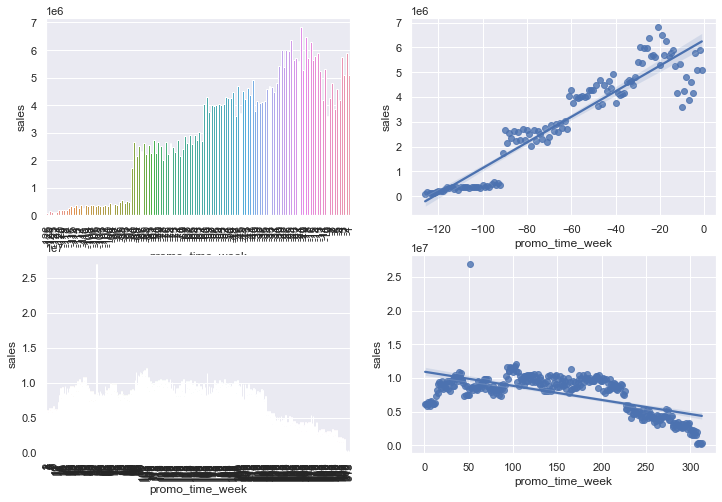

In [45]:

aux2 = aux1.loc[aux1['promo_time_week']<0]
aux3 = aux1.loc[aux1['promo_time_week']>0]

plt.subplot(2,2,1)
sns.barplot(x='promo_time_week',y='sales',data=aux2)
plt.xticks(rotation=90);


plt.subplot(2,2,2)
sns.regplot(x='promo_time_week',y='sales',data=aux2)

plt.subplot(2,2,3)
sns.barplot(x='promo_time_week',y='sales',data=aux3)
plt.xticks(rotation=90);

plt.subplot(2,2,4)
sns.regplot(x='promo_time_week',y='sales',data=aux3)


* lojas que irão ter promoção vendem mais, porém depois de um longo período de promoção, as vendas decaem

### 3.3.10 LOJA COM PROMOCOES CONSECUTIVAS VENDE MAIS -> FALSE

In [78]:
df3[['promo2','promo','sales']].groupby(['promo','promo2']).sum().reset_index()

## as menores vendas foram das lojas que possuem participação na promoção2
## portanto a promo2 não é uma boa opção de negócio!

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


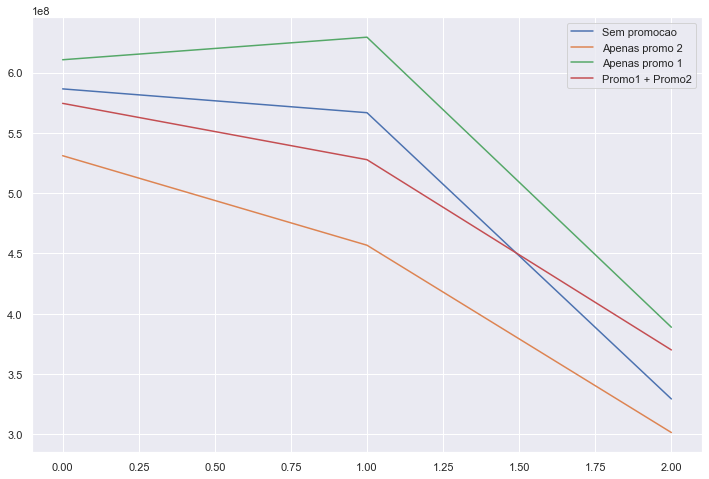

In [83]:
aux = df3[['promo2','promo','sales','year_week']]
aux2 = aux[(aux['promo']==0)&(aux['promo2']==0)][['sales','year_week']].groupby('year_week').sum().reset_index()
ax = aux2.plot()

aux3 = aux[(aux['promo']==0)&(aux['promo2']==1)][['sales','year_week']].groupby('year_week').sum().reset_index()
ax2 = aux3.plot(ax=ax)

aux4 = aux[(aux['promo']==1)&(aux['promo2']==0)][['sales','year_week']].groupby('year_week').sum().reset_index()
ax3 = aux4.plot(ax=ax2)

aux5 = aux[(aux['promo']==1)&(aux['promo2']==1)][['sales','year_week']].groupby('year_week').sum().reset_index()
aux5.plot(ax=ax3)
ax.legend(labels=['Sem promocao','Apenas promo 2','Apenas promo 1','Promo1 + Promo2'])



* Lojas com promo2 tendem a diminuir vendas!

## 3.4 Analise multivariada



### 3.4.1 Variáveis Numéricas

<AxesSubplot:>

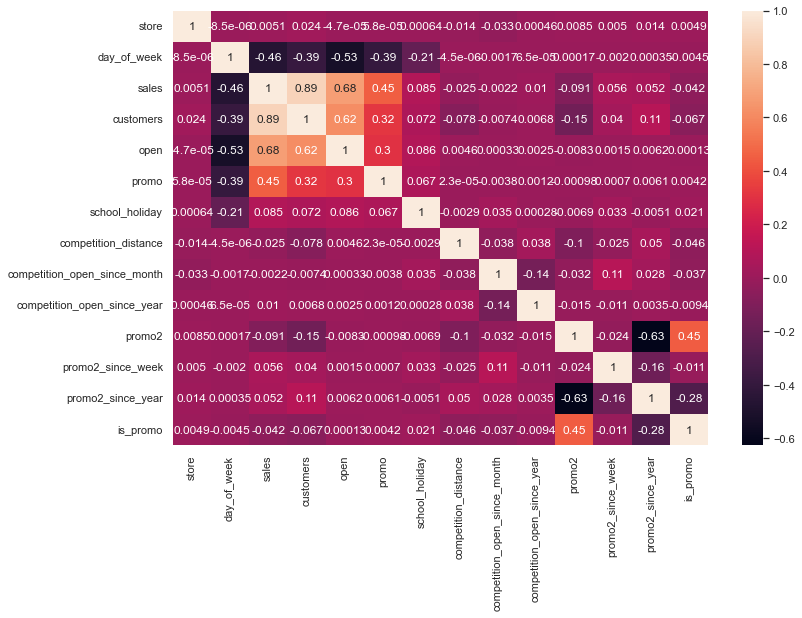

In [85]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation,annot=True)

### 3.4.2 Variáveis Categóricas

In [96]:
from scipy import stats as ss

In [116]:
#renovar as variaveis categoricas
cat = df3.select_dtypes(include='object')
cat.head()

,state_holiday,store_type,assortment,year_week
0,regular_day,c,basic,2015-00
1,regular_day,a,basic,2015-00
2,regular_day,a,basic,2015-00
3,regular_day,c,extended,2015-00
4,regular_day,a,basic,2015-00


In [114]:
# função pra calcular a correlação de variaveis categóricas
def cramer_v(x,y):
    #criar um matriz entre as variaveis categoricas
    a = pd.crosstab(x,y)
    cm = a.to_numpy()
    
    #modelagem do método V-CRAMER
    n=cm.sum()
    r,k = cm.shape
    
    chi2 = ss.chi2_contingency(cm)[0] ##posição 0 -> correlação 
    
    #correção do BIAS
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
   
    
    v = np.sqrt ( (chi2corr/n) / (min(kcorr-1,rcorr-1) ) )
    return v 

In [120]:
a1 = cramer_v(cat['state_holiday'],cat['state_holiday'])
a2 = cramer_v(cat['state_holiday'],cat['store_type'])
a3 = cramer_v(cat['state_holiday'],cat['assortment'])

a4 = cramer_v(cat['store_type'],cat['state_holiday'])
a5 = cramer_v(cat['store_type'],cat['store_type'])
a6 = cramer_v(cat['store_type'],cat['assortment'])

a7 = cramer_v(cat['assortment'],cat['state_holiday'])
a8 = cramer_v(cat['assortment'],cat['store_type'])
a9 = cramer_v(cat['assortment'],cat['assortment'])

d = pd.DataFrame ( {'state_holiday':[a1,a2,a3],
                'store_type':[a4,a5,a6],
                'assortment':[a7,a8,a9]})

d= d.set_index(d.columns)
d


,state_holiday,store_type,assortment
state_holiday,1.000002,0.071065,0.067546
store_type,0.071065,1.000002,0.538457
assortment,0.067546,0.538457,1.000001


<AxesSubplot:>

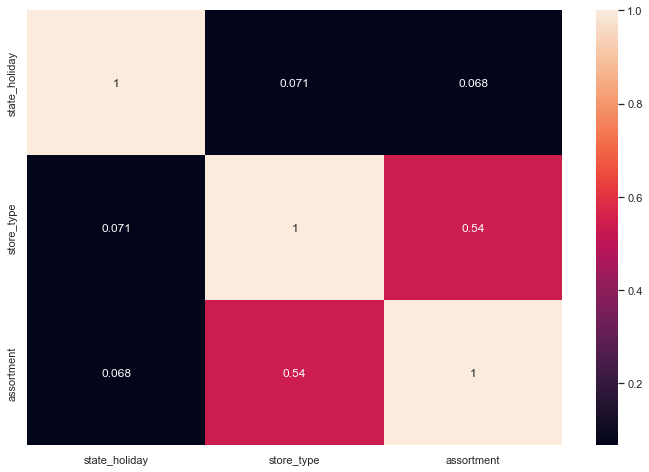

In [121]:
sns.heatmap(d,annot=True)

# 4. DATA MODELING



# 5. SELECT ATTRIBUTES


# 6. MACHINE LEARNING ALGORITHMS



## 6.1 CROSS-VALIDATION

## 6.2 FINE TUNING